In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

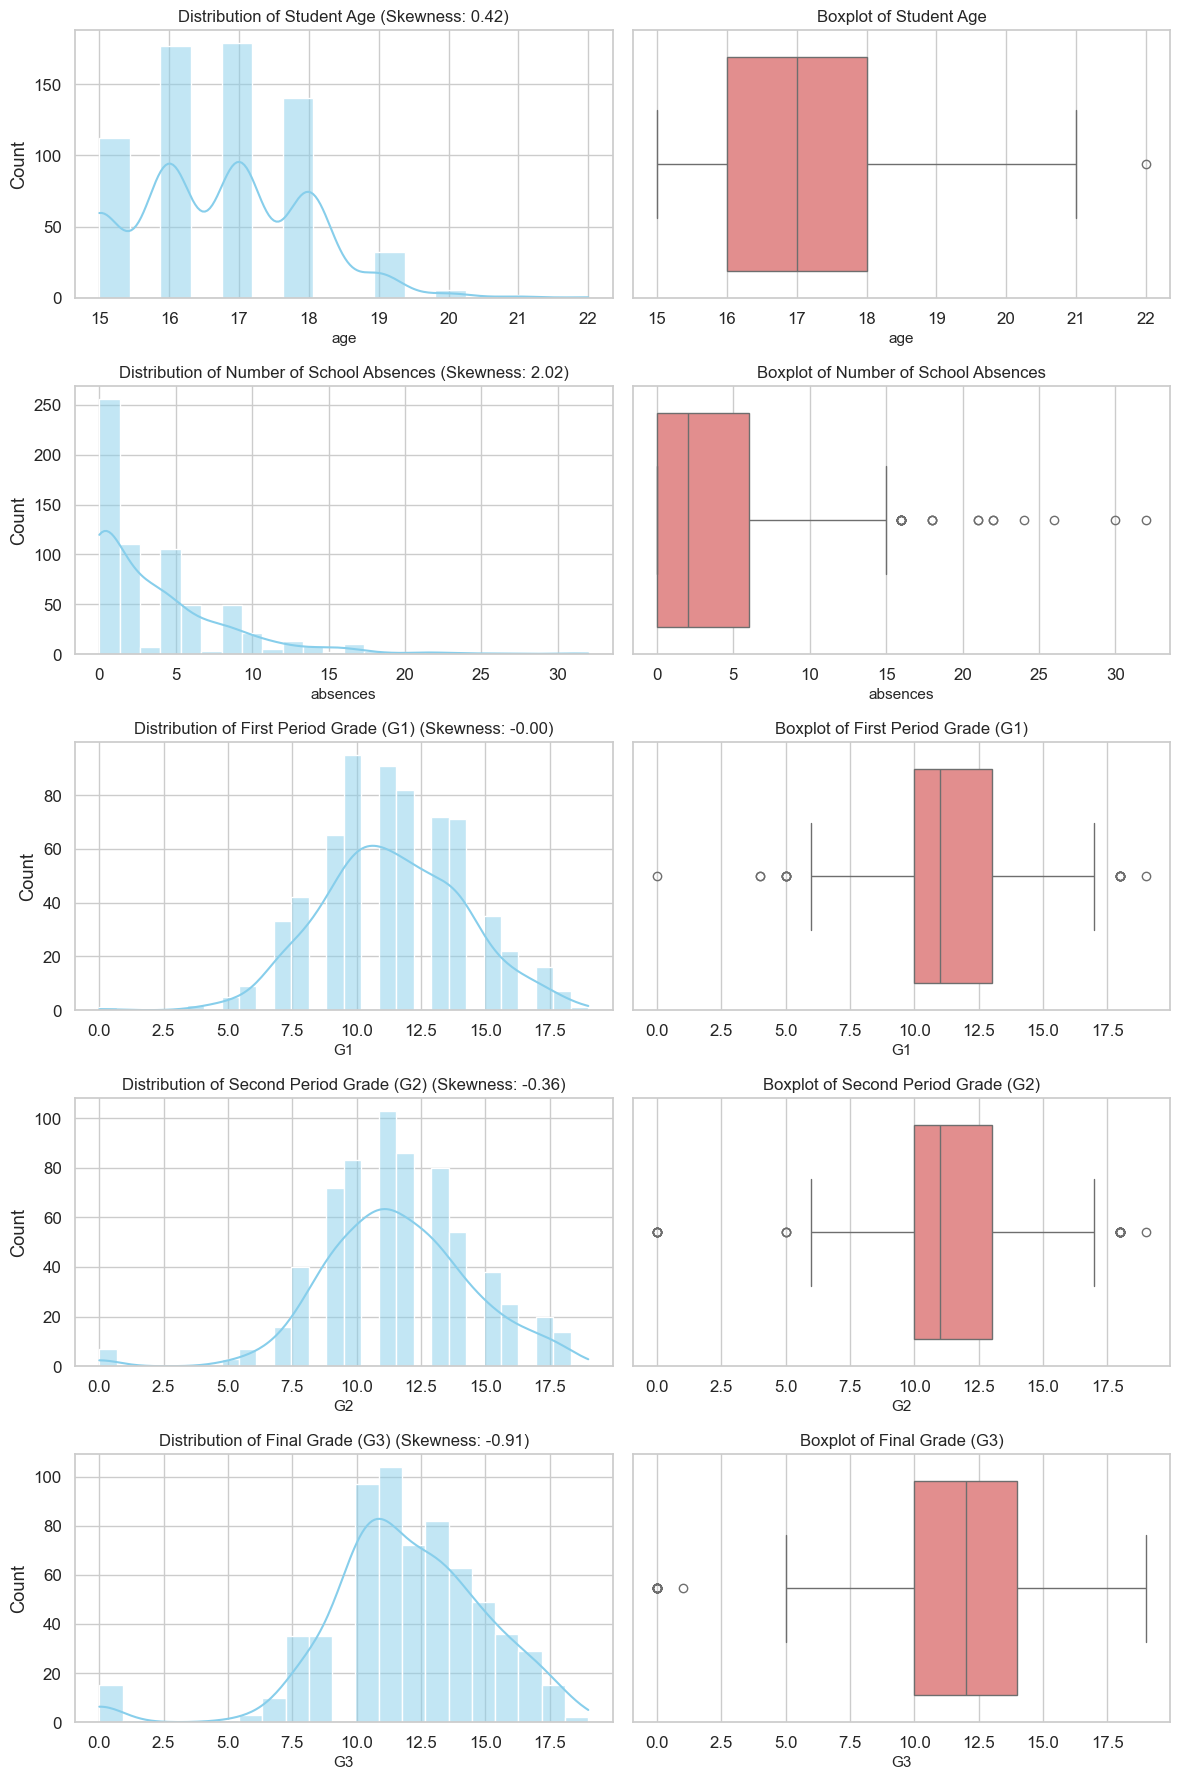

In [98]:
# Load the preprocessed dataset
df = pd.read_csv('../data/student_preprocessed.csv')

# Set Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Continuous variables
continuous_vars = ["age", "absences", "G1", "G2", "G3"]

# Create a single figure: 5 rows × 2 columns
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(12, 18))

# Ensure axes is always 2D (avoids numpy.ndarray error)
axes = np.atleast_2d(axes)

# Custom titles for histograms (left column)
hist_titles = [
    "Distribution of Student Age",
    "Distribution of Number of School Absences",
    "Distribution of First Period Grade (G1)",
    "Distribution of Second Period Grade (G2)",
    "Distribution of Final Grade (G3)"
]

# Custom titles for boxplots (right column)
box_titles = [
    "Boxplot of Student Age",
    "Boxplot of Number of School Absences",
    "Boxplot of First Period Grade (G1)",
    "Boxplot of Second Period Grade (G2)",
    "Boxplot of Final Grade (G3)"
]

for i, var in enumerate(continuous_vars):
    # --- Histogram + KDE ---
    sns.histplot(df[var], kde=True, ax=axes[i, 0], color="skyblue")
    skewness = df[var].skew()
    axes[i, 0].set_title(f"{hist_titles[i]} (Skewness: {skewness:.2f})", fontsize=12)
    axes[i, 0].set_xlabel(var, fontsize=11)
    axes[i, 0].set_ylabel("Count")

    # --- Boxplot ---
    sns.boxplot(x=df[var], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(box_titles[i], fontsize=12)
    axes[i, 1].set_xlabel(var, fontsize=11)
  

plt.tight_layout()
plt.show()


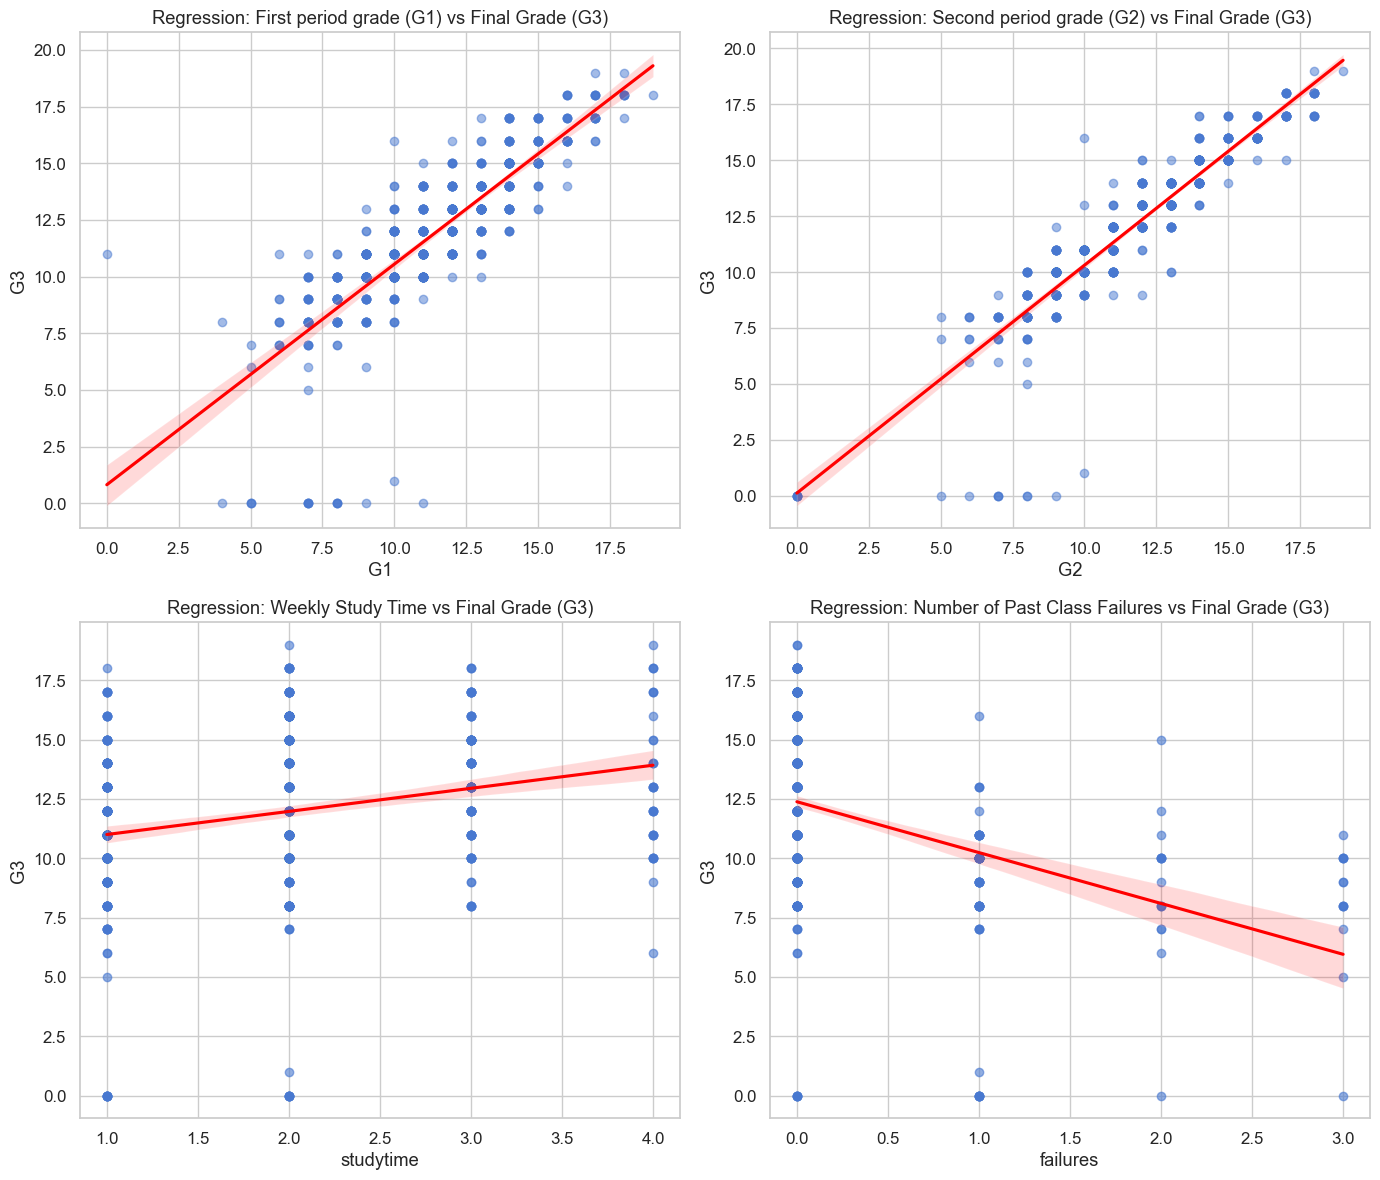

In [99]:
# 2. Correlation, Scatter plots with regression lines
# Scatter plots with regression lines for key relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# G1 vs G3
sns.regplot(x="G1", y="G3", data=df, ax=axes[0, 0], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
axes[0, 0].set_title("Regression: First period grade (G1) vs Final Grade (G3)")

# G2 vs G3
sns.regplot(x="G2", y="G3", data=df, ax=axes[0, 1], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
axes[0, 1].set_title("Regression: Second period grade (G2) vs Final Grade (G3)")

# Studytime vs G3
sns.regplot(x="studytime", y="G3", data=df, ax=axes[1, 0], scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
axes[1, 0].set_title("Regression: Weekly Study Time vs Final Grade (G3)")

# Failures vs G3
sns.regplot(x="failures", y="G3", data=df, ax=axes[1, 1], scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
axes[1, 1].set_title("Regression: Number of Past Class Failures vs Final Grade (G3)")

plt.tight_layout()
plt.show()

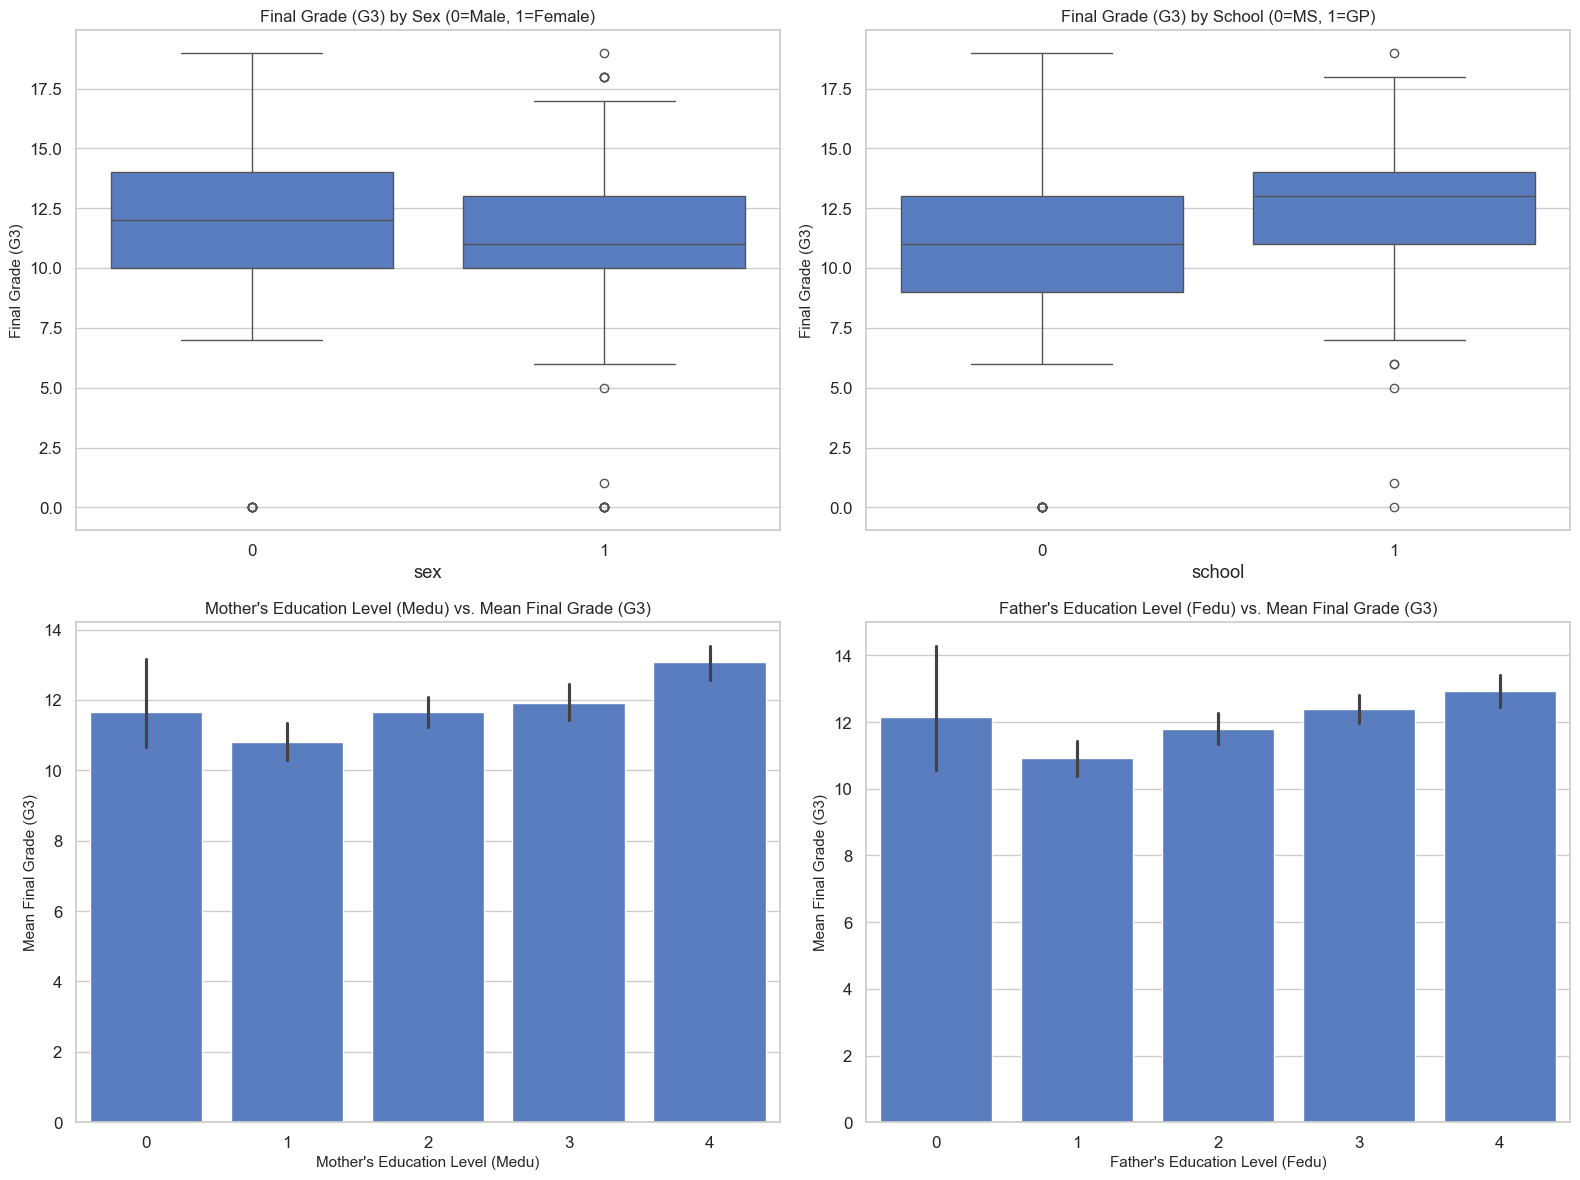

In [100]:
# 3. Group Comparisons (Boxplots & Bar charts)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot: G3 by sex
sns.boxplot(x="sex", y="G3", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Final Grade (G3) by Sex (0=Male, 1=Female)", fontsize=12)
axes[0, 0].set_ylabel("Final Grade (G3)", fontsize=11)

# Boxplot: G3 by school
sns.boxplot(x="school", y="G3", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Final Grade (G3) by School (0=MS, 1=GP)", fontsize=12)
axes[0, 1].set_ylabel("Final Grade (G3)", fontsize=11)

# Barplot: Mother education vs. mean G3
sns.barplot(x="Medu", y="G3", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Mother's Education Level (Medu) vs. Mean Final Grade (G3)", fontsize=12)
axes[1, 0].set_xlabel("Mother's Education Level (Medu)", fontsize=11)
axes[1, 0].set_ylabel("Mean Final Grade (G3)", fontsize=11)

# Barplot: Father education vs. mean G3
sns.barplot(x="Fedu", y="G3", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Father's Education Level (Fedu) vs. Mean Final Grade (G3)", fontsize=12)
axes[1, 1].set_xlabel("Father's Education Level (Fedu)", fontsize=11)
axes[1, 1].set_ylabel("Mean Final Grade (G3)", fontsize=11)

plt.tight_layout()
plt.show()